In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
diabetes = load_diabetes()

In [4]:
df = pd.DataFrame(data = diabetes.data,columns = diabetes.feature_names)

In [5]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


<Axes: ylabel='s3'>

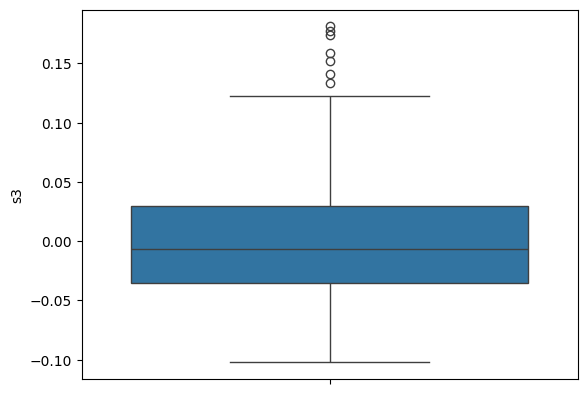

In [26]:
sns.boxplot(df['s3'])

In [6]:
ul = df['s3'].mean() + 3*df['s3'].std()

In [7]:
ul

0.1428571428571428

In [10]:
ll = df['s3'].mean() - 3*df['s3'].std()

In [11]:
ll

-0.1428571428571428

In [12]:
df.loc[(df['s3']>ul) | (df['s3']<ll)]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
58,0.041708,-0.044642,-0.064408,0.035644,0.012191,-0.057994,0.181179,-0.076395,-0.000612,-0.050783
260,0.041708,-0.044642,-0.008362,-0.057313,0.008063,-0.031376,0.151726,-0.076395,-0.080237,-0.017646
261,0.048974,-0.044642,-0.041774,0.104501,0.035582,-0.025739,0.177497,-0.076395,-0.012909,0.015491
269,0.009016,-0.044642,-0.032073,-0.026328,0.042462,-0.010395,0.159089,-0.076395,-0.011897,-0.038357
441,-0.045472,-0.044642,-0.073030,-0.081413,0.083740,0.027809,0.173816,-0.039493,-0.004222,0.003064


# trimming

In [21]:
new_df  = df.loc[(df['s3']<ul) & (df['s3']>ll)]

In [24]:
print("before removing the outliers",len(df))
print("after removing the outliers",len(new_df))
print("outliers of particular columns  = ",len(df)-len(new_df))

before removing the outliers 442
after removing the outliers 437
outliers of particular columns  =  5


<Axes: ylabel='s3'>

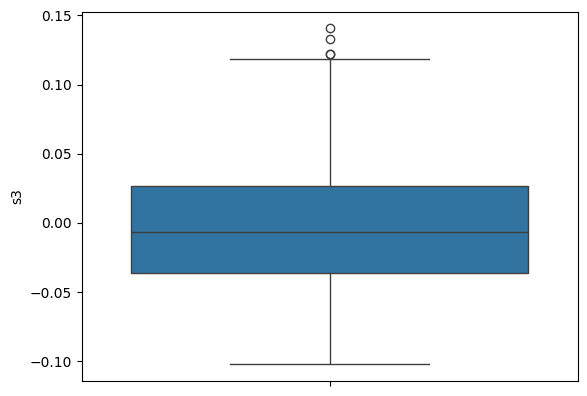

In [25]:
sns.boxplot(new_df['s3'])

**cappiing = change the outlier values to upper or lower limit values**

In [27]:
new_df =df.copy()

In [28]:
new_df.loc[new_df['s3']>ul,'s3'] = ul
new_df.loc[new_df['s3']<ll,'s3'] = ll

<Axes: ylabel='s3'>

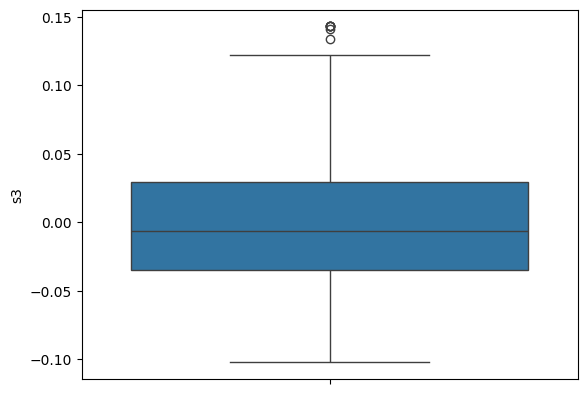

In [29]:
sns.boxplot(new_df['s3'])

In [30]:
len(new_df)

442

# IQR METHOD

In [31]:
q1 = df['s3'].quantile(0.25)
q3 = df['s3'].quantile(0.75)
iqr = q3-q1

In [32]:
print(q1)
print(q3)
print(iqr)

-0.035117160592829294
0.02931150097869218
0.06442866157152147


In [33]:
upper_limit = q3 +(1.5*iqr)
lower_limit = q1 -(1.5*iqr)
lower_limit,upper_limit

(-0.1317601529501115, 0.1259544933359744)

<Axes: ylabel='s3'>

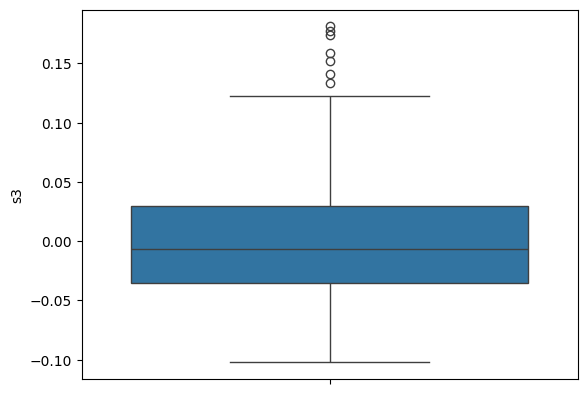

In [34]:
sns.boxplot(df['s3'])

In [35]:
df.loc[(df['s3']>ul) | (df['s3']<ll)]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
58,0.041708,-0.044642,-0.064408,0.035644,0.012191,-0.057994,0.181179,-0.076395,-0.000612,-0.050783
260,0.041708,-0.044642,-0.008362,-0.057313,0.008063,-0.031376,0.151726,-0.076395,-0.080237,-0.017646
261,0.048974,-0.044642,-0.041774,0.104501,0.035582,-0.025739,0.177497,-0.076395,-0.012909,0.015491
269,0.009016,-0.044642,-0.032073,-0.026328,0.042462,-0.010395,0.159089,-0.076395,-0.011897,-0.038357
441,-0.045472,-0.044642,-0.073030,-0.081413,0.083740,0.027809,0.173816,-0.039493,-0.004222,0.003064


In [36]:
new_df  = df.loc[(df['s3']<ul) & (df['s3']>ll)]
print("before removing the outliers",len(df))
print("after removing the outliers",len(new_df))
print("outliers of particular columns  = ",len(df)-len(new_df))

before removing the outliers 442
after removing the outliers 437
outliers of particular columns  =  5


<Axes: ylabel='s3'>

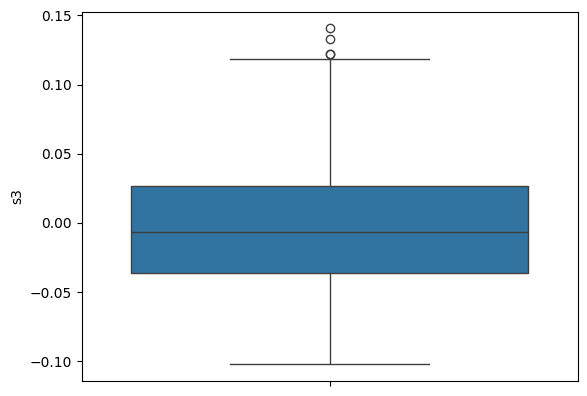

In [38]:
sns.boxplot(new_df['s3'])

In [39]:
new_df = df.copy()

In [40]:
new_df.loc[(new_df['s3']>upper_limit),'s3'] = upper_limit
new_df.loc[(new_df['s3']<lower_limit),'s3'] = lower_limit


<Axes: ylabel='s3'>

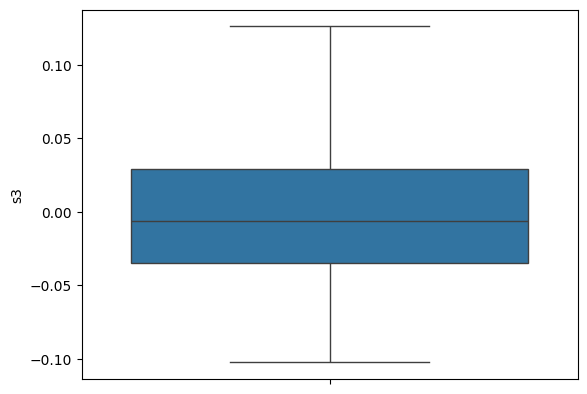

In [41]:
sns.boxplot(new_df['s3'])